In [1]:
import pandas as pd

In [2]:
df_csv = pd.read_csv("dataset/Crimes_-_2023_20250508.zip")

df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262950 entries, 0 to 262949
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    262950 non-null  int64  
 1   Case Number           262950 non-null  object 
 2   Date                  262950 non-null  object 
 3   Block                 262950 non-null  object 
 4   IUCR                  262950 non-null  object 
 5   Primary Type          262950 non-null  object 
 6   Description           262950 non-null  object 
 7   Location Description  261512 non-null  object 
 8   Arrest                262950 non-null  bool   
 9   Domestic              262950 non-null  bool   
 10  Beat                  262950 non-null  int64  
 11  District              262950 non-null  int64  
 12  Ward                  262947 non-null  float64
 13  Community Area        262950 non-null  int64  
 14  FBI Code              262950 non-null  object 
 15  

In [3]:
print(df_csv["Year"].unique())

[2023]


In [11]:
df_csv["Date"] = pd.to_datetime(df_csv["Date"])
df_csv["año"] = df_csv["Date"].dt.year
df_csv["mes"] = df_csv["Date"].dt.month
df_csv.head()

C:\Users\Pablo\AppData\Local\Temp\ipykernel_20388\2590099919.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_csv["Date"] = pd.to_datetime(df_csv["Date"])


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,año,mes
0,13327763,JH103488,2023-12-31 23:59:00,010XX N ORLEANS ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,14,1173727.0,1907173.0,2023,12/21/2024 03:40:46 PM,41.900698,-87.637330,POINT (-87.637329754 41.900698378),2023,12
1,13324997,JH100010,2023-12-31 23:51:00,009XX E 77TH ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,False,True,...,04A,1183685.0,1854148.0,2023,12/21/2024 03:40:46 PM,41.754967,-87.602411,POINT (-87.602410989 41.754966726),2023,12
2,13325009,JH100002,2023-12-31 23:51:00,051XX S PRINCETON AVE,0550,ASSAULT,AGGRAVATED POLICE OFFICER - HANDGUN,STREET,True,False,...,04A,1175152.0,1871065.0,2023,12/21/2024 03:40:46 PM,41.801584,-87.633177,POINT (-87.633177068 41.801583507),2023,12
3,13324881,JH100006,2023-12-31 23:50:00,051XX S WASHTENAW AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,08B,1159244.0,1870437.0,2023,12/21/2024 03:40:46 PM,41.800201,-87.691535,POINT (-87.691535096 41.800200965),2023,12
4,13327752,JH102557,2023-12-31 23:50:00,001XX W WACKER DR,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,06,1175349.0,1902127.0,2023,12/21/2024 03:40:46 PM,41.886816,-87.631524,POINT (-87.631523712 41.886815622),2023,12


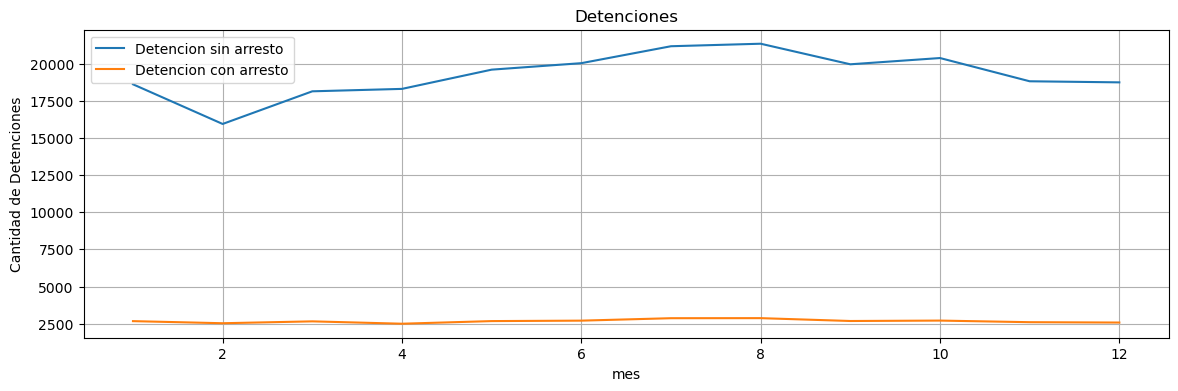

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


detencion_con_arresto = df_csv[df_csv['Arrest'] == True].groupby('mes').size()
detencion_sin_arresto = df_csv[df_csv['Arrest'] == False].groupby('mes').size()

#print(detencion_con_arresto)
#print(detencion_sin_arresto)

plt.figure(figsize=(14, 4))

plt.plot(detencion_sin_arresto, label="Detencion sin arresto")
plt.plot(detencion_con_arresto, label="Detencion con arresto")


# Títulos y etiquetas
plt.title("Detenciones")
plt.xlabel("mes")
plt.ylabel("Cantidad de Detenciones")
plt.legend()
plt.grid(True)

plt.show()


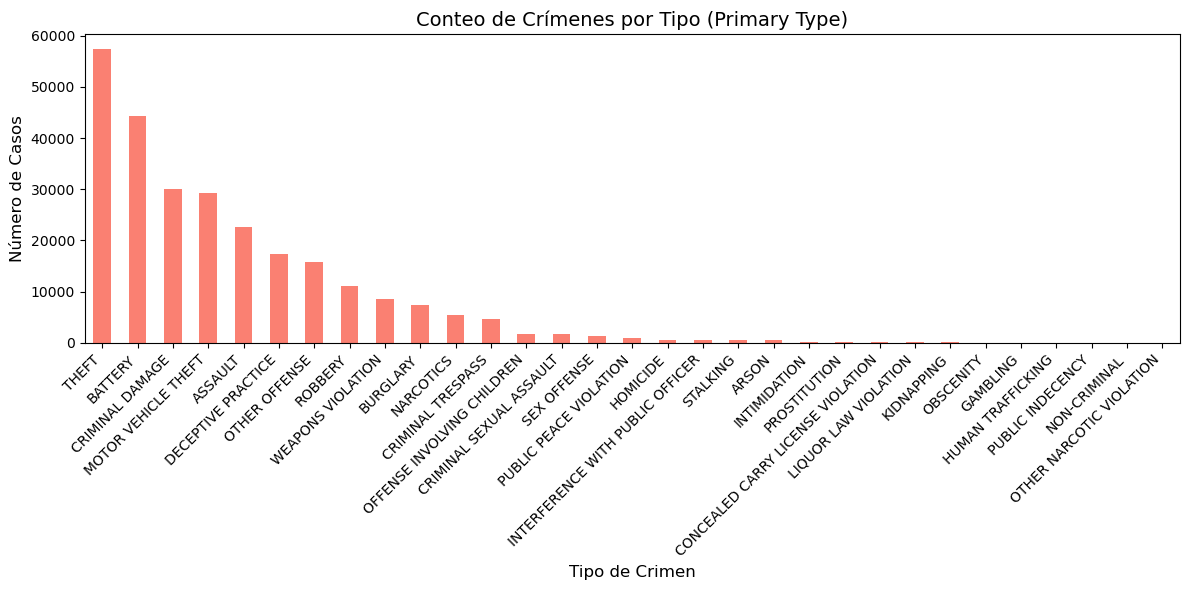

In [14]:
#Conteo de crímenes por tipo
# Paso 2: Contar los crímenes por tipo (columna 'Primary Type')
crimenes_por_tipo = df_csv['Primary Type'].value_counts().sort_values(ascending=False)

# Paso 3: Graficar en un gráfico de barras
plt.figure(figsize=(12, 6))
crimenes_por_tipo.plot(kind='bar', color='salmon')

# Etiquetas y título
plt.title('Conteo de Crímenes por Tipo', fontsize=14)
plt.xlabel('Tipo de Crimen', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)

# Ajustes de las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Ajuste del layout para que no se corte nada
plt.tight_layout()

# Mostrar el gráfico
plt.show()
